In [375]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#Progreebar
from tqdm import tqdm

# For transformations and predictions
from scipy.optimize import curve_fit

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans 

In [424]:
df=pd.read_csv('Data.csv')
df.head()

acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428     1   
1    8    0.0763   -28.454     1   
2    5    0.1190   -19.924     0   
3    1    0.1110   -14.734     0   
4   11    0.0980   -16.829     1   

                                            name  popularity release_date  \
0                    Singende Bataillone 1. Teil           0         1928   
1       Fantasiestücke, Op. 111: Più tosto lento           0         1928   
2                 Chapter 1.18 - Zamek kaniowski           0         1928   
3  Bebamos Juntos - Instrumental (Remasterizado)           0   1928-09-25   
4    Polonaise-Fantaisie in A-Flat Major, Op. 61           1         1928   

   speechiness    tempo  valence  year  
0       0.0506  118.469   0.7790  1928  
1       0.0462   83.972   0.0767  1928  
2       0.9290  107.177   0.8800  1928  
3       0.0926  108.003   0.7200  1928  
4       0.0424   62.149   0.0693  1928

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

Delete useless variables

In [426]:
df=df.drop(columns=['name','release_date','id'])

In [427]:
df.head()

acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit  instrumentalness  key  liveness  loudness  \
0       158648  0.1950         0             0.563   10    0.1510   -12.428   
1       282133  0.0135         0             0.901    8    0.0763   -28.454   
2       104300  0.2200         0             0.000    5    0.1190   -19.924   
3       180760  0.1300         0             0.887    1    0.1110   -14.734   
4       687733  0.2040         0             0.908   11    0.0980   -16.829   

   mode  popularity  speechiness    tempo  valence  year  
0     1           0       0.0506  118.469   0.7790  1928  
1     1           0       0.0462   83.972   0.0767  1928  
2     0           0       0.9290  107.177   0.8800  1928  
3     0           0       0.0926  108.003   0.7200  1928  
4     1           1       0.0424   62.149   0.0693  1928

Reduce Multicollinearity

<AxesSubplot:>

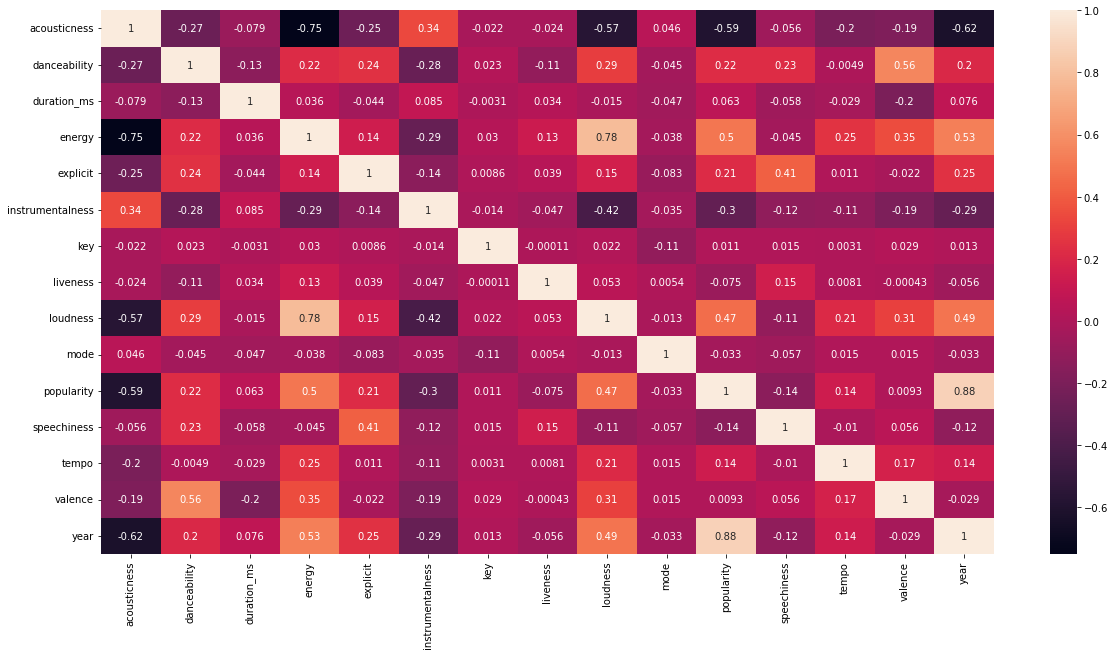

In [428]:
df_num=df.drop(columns=['artists'])
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

In [429]:
df=df.drop(columns=['loudness'])

Check the relationahip in the dataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 [Text(0, 0, '1921'),
  Text(1, 0, '1922'),
  Text(2, 0, '1923'),
  Text(3, 0, '1924'),
  Text(4, 0, '1925'),
  Text(5, 0, '1926'),
  Text(6, 0, '1927'),
  Text(7, 0, '1928'),
  Text(8, 0, '1929'),
  Text(9, 0, '1930'),
  Text(10, 0, '1931'),
  Text(11, 0, '1932'),
  Text(12, 0, '1933'),
  Text(13, 0, '1934'),
  Text(14, 0, '1935'),
  Text(15, 0, '1936'),
  Text(16, 0, '1937'),
  Text(17, 0, '1938'),
  Text(18, 0, '1939'),
  Text(19, 0, '1940'),
  Text(20, 0, '1941'),
  Text(21, 0, '1942'),
  Text(22, 0, '1943'),
  Text(23, 0, '1944'),
  Text(2

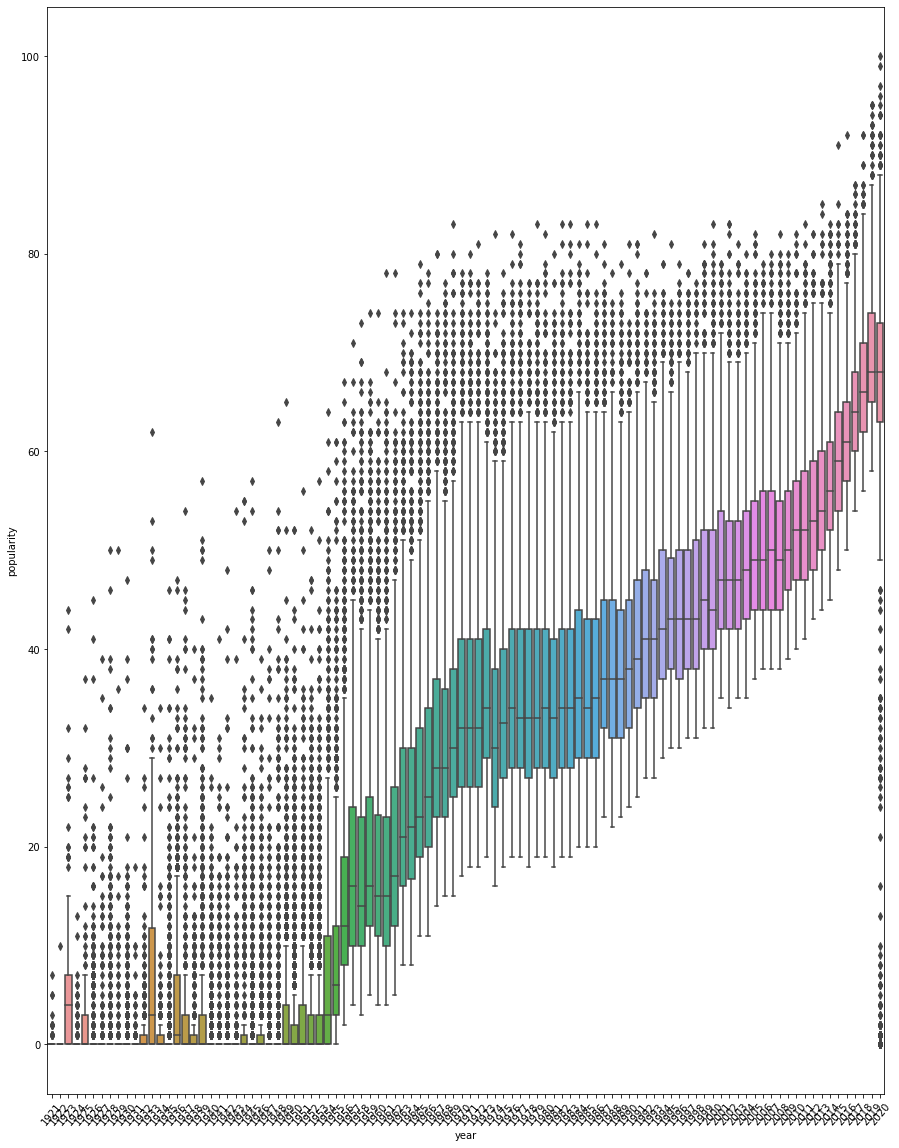

In [430]:
#relationship between popularity and years
plt.figure(figsize=(15,20))
sns.boxplot(x='year', y='popularity', data=df)
plt.xticks(rotation=50)

Text(0.5, 0, 'popularity')

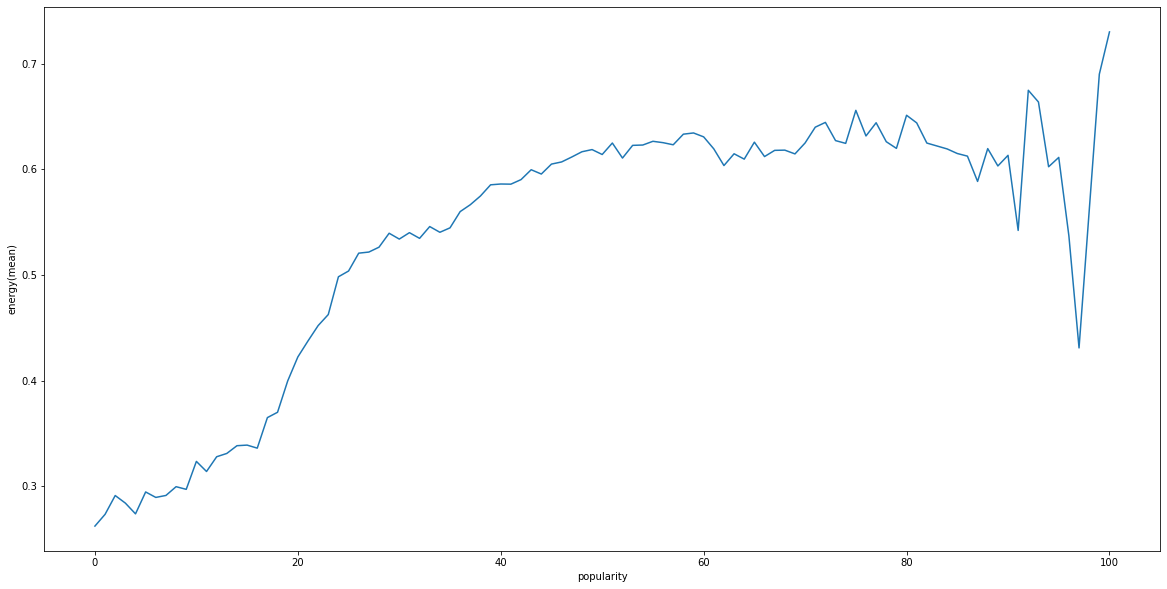

In [431]:
#relationship between popularity and energy (ploted by mean)
plt.figure(figsize=(20,10))
df1=df.iloc[:,[4,10]].groupby(by='popularity').mean()
plt.plot(df1)
plt.ylabel('energy(mean)')
plt.xlabel('popularity')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, "['The Beatles']"),
  Text(1, 0, "['The Rolling Stones']"),
  Text(2, 0, "['Bob Dylan']"),
  Text(3, 0, "['Elvis Presley']"),
  Text(4, 0, "['Frank Sinatra']"),
  Text(5, 0, "['Led Zeppelin']"),
  Text(6, 0, "['Fleetwood Mac']"),
  Text(7, 0, "['Queen']"),
  Text(8, 0, "['The Beach Boys']"),
  Text(9, 0, "['Johnny Cash']")])

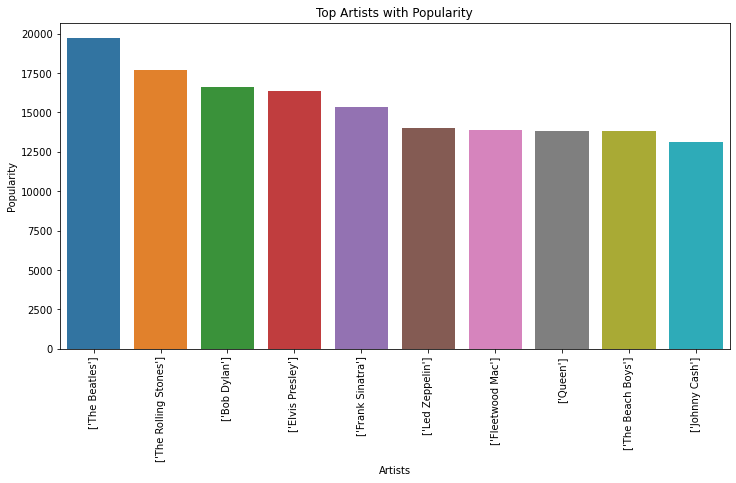

In [432]:
plt.figure(figsize=(12,6))
x = df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

# Principal component analysis (PCA)

In [433]:
df_n = df.drop(['artists','year'], axis=1)

In [434]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   danceability      169909 non-null  float64
 2   duration_ms       169909 non-null  int64  
 3   energy            169909 non-null  float64
 4   explicit          169909 non-null  int64  
 5   instrumentalness  169909 non-null  float64
 6   key               169909 non-null  int64  
 7   liveness          169909 non-null  float64
 8   mode              169909 non-null  int64  
 9   popularity        169909 non-null  int64  
 10  speechiness       169909 non-null  float64
 11  tempo             169909 non-null  float64
 12  valence           169909 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 16.9 MB


In [439]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [440]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import plotly_express as px
import plotly.graph_objs as go
# import plotly.plotly as py

In [442]:
from chart_studio.plotly import plot, iplot

ModuleNotFoundError: No module named 'chart_studio'

In [443]:
from plotly.offline import iplot

## PCA to reduce dimensionality

In this step I use PCA to reduce the dimensionality of original attribute space. I use PCA Explained Variance plot below to help determine the right level of components. We chose 2 components PCA as it can achieve nearly 100% explained variance with just few components.

In [444]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_n)

In [445]:
pcaratio = pca.explained_variance_ratio_
trace = go.Scatter(x=np.arange(len(pcaratio)),y=np.cumsum(pcaratio))
data = [trace]
layout = dict(title="PCA Explained Variance")
fig = dict(data=data, layout=layout)
iplot(fig)

In [446]:
pca2 = PCA(n_components=2)
dfPCA2 = pca2.fit_transform(df_n)

## Elbow Method

I use Elbow Method for optimal value of k in KMeans, and pick 4 as the optimal clustering

In [447]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dfPCA2) 
    wcss.append(kmeans.inertia_)

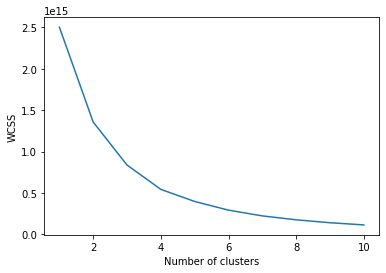

In [448]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [449]:
kmeans = KMeans(n_clusters=4)
dfPCA_labels = kmeans.fit_predict(dfPCA2)

In [450]:
df_dfPCA = pd.DataFrame(dfPCA2)
df_dfPCA['cluster'] = dfPCA_labels

In [451]:
df_dfPCA.columns = ['x1','x2','cluster']

In [452]:
df_dfPCA

x1         x2  cluster
0       -72758.159334  -4.560597        3
1        50726.840907 -37.860278        0
2      -127106.159246 -15.948352        3
3       -50646.159258 -14.746870        3
4       456326.841041 -57.054884        1
...               ...        ...      ...
169904  -67606.158354  -9.186389        3
169905  -63938.158683  16.385743        3
169906  -50706.158585  13.302509        3
169907  -64098.158629  19.347492        3
169908  -16619.158329 -29.831139        3

[169909 rows x 3 columns]

## Visualized on PCA

In [453]:
from matplotlib import pyplot as plt

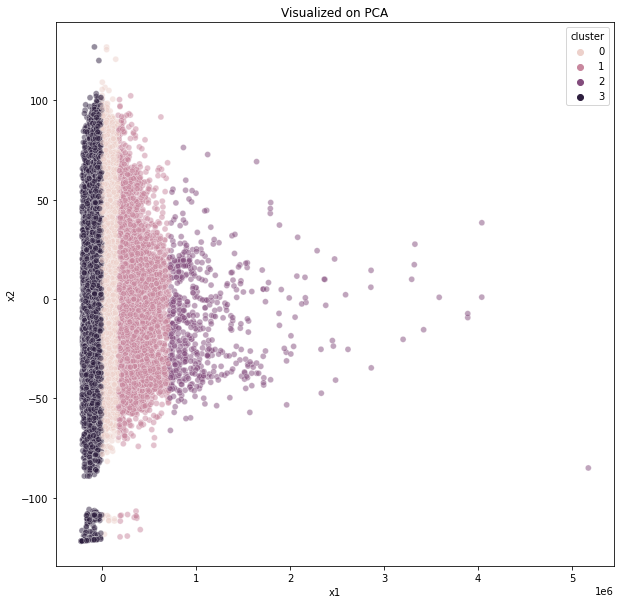

In [454]:
plt.figure(figsize=(10,10))

sns.scatterplot(data=df_dfPCA,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5)
plt.title('Visualized on PCA')
plt.show()

## Unique characteristics of each cluster

In [455]:
df_n['cluster'] = dfPCA_labels

In [456]:
def outside_limit(df, label_col, label, sensitivity):
  feature_list = df_n.columns[:-1]
  
  plot_list = []
  mean_overall_list = []
  mean_cluster_list = []
  
  for i,varname in enumerate(feature_list):
    
    #     get overall mean for a variable, set lower and upper limit
    mean_overall = df[varname].mean()
    lower_limit = mean_overall - (mean_overall*sensitivity)
    upper_limit = mean_overall + (mean_overall*sensitivity)

    #     get cluster mean for a variable
    cluster_filter = df[label_col]==label
    pd_cluster = df[cluster_filter]
    mean_cluster = pd_cluster[varname].mean()
    #     create filter to display graph with 0.5 deviation from the mean
    if mean_cluster <= lower_limit or mean_cluster >= upper_limit:
      plot_list.append(varname)
      mean_overall_std = mean_overall/mean_overall
      mean_cluster_std = mean_cluster/mean_overall
      mean_overall_list.append(mean_overall_std)
      mean_cluster_list.append(mean_cluster_std)
   
  mean_df = pd.DataFrame({'feature_list':plot_list,
                         'mean_overall_list':mean_overall_list,
                         'mean_cluster_list':mean_cluster_list})
  mean_df = mean_df.sort_values(by=['mean_cluster_list'], ascending=False)
  
  return mean_df

def plot_barchart_all_unique_features(df, label_col, label, ax, sensitivity):
  
  mean_df = outside_limit(df, label_col, label, sensitivity)
  mean_df_to_plot = mean_df.drop(['mean_overall_list'], axis=1)
  
  if len(mean_df.index) != 0:
    sns.barplot(y='feature_list', x='mean_cluster_list', data=mean_df_to_plot, palette=sns.cubehelix_palette(20, start=.5, rot=-.75, reverse=True), \
                alpha=0.75, dodge=True, ax=ax)

    for i,p in enumerate(ax.patches):
      ax.annotate("{:.02f}".format((p.get_width())), 
                  (1, p.get_y() + p.get_height() / 2.), xycoords=('axes fraction', 'data'),
                  ha='right', va='top', fontsize=10, color='black', rotation=0, 
                  xytext=(0, 0),
                  textcoords='offset pixels')
  
  ax.set_title('Unique Characteristics of Cluster ' + str(label))
  ax.set_xlabel('Standardized Mean')
  ax.axvline(x=1, color='k')

def plot_features_all_cluster(df, label_col, n_clusters, sensitivity):
  n_plot = n_clusters
  fig, ax = plt.subplots(n_plot, 1, figsize=(12, n_plot*4), sharex='col')
  ax= ax.ravel()
  
  label = np.arange(n_clusters)
  for i in label:
    plot_barchart_all_unique_features(df, label_col, label=i, ax=ax[i], sensitivity=sensitivity)
    ax[i].xaxis.set_tick_params(labelbottom=True)
    
  plt.tight_layout()
  display(fig)

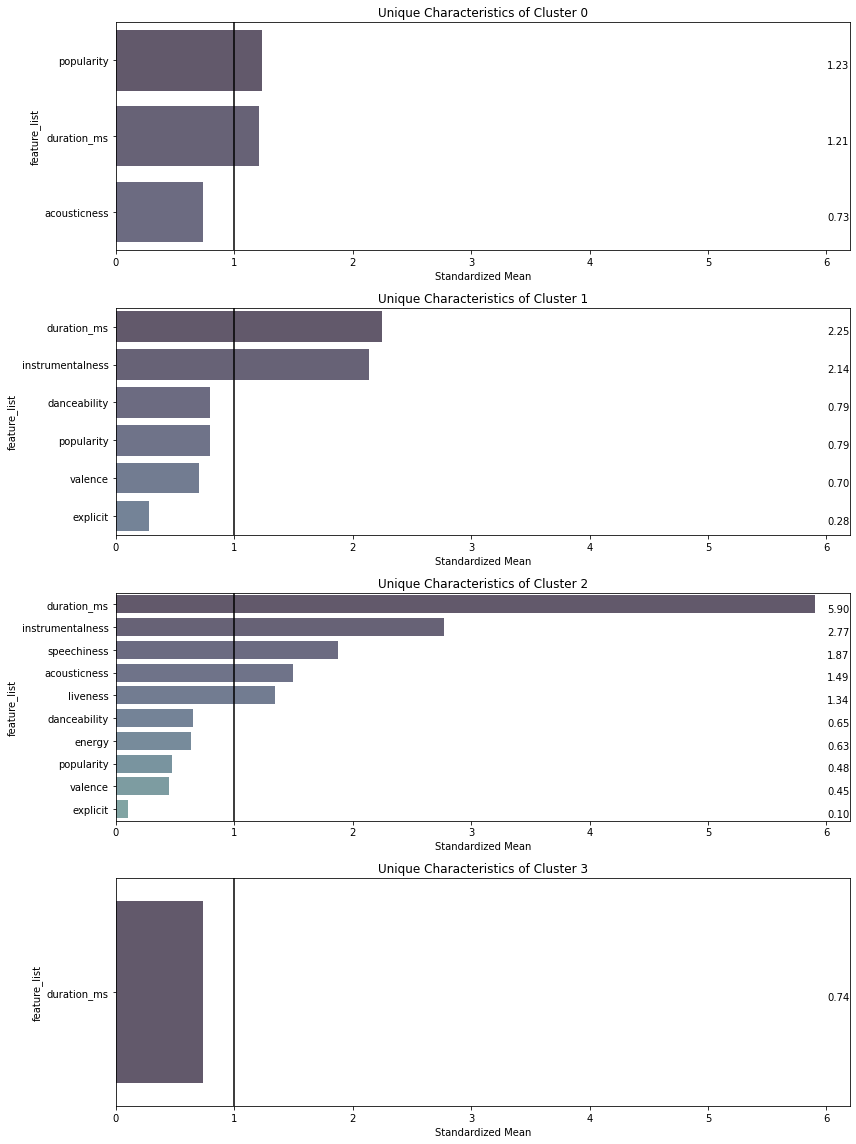

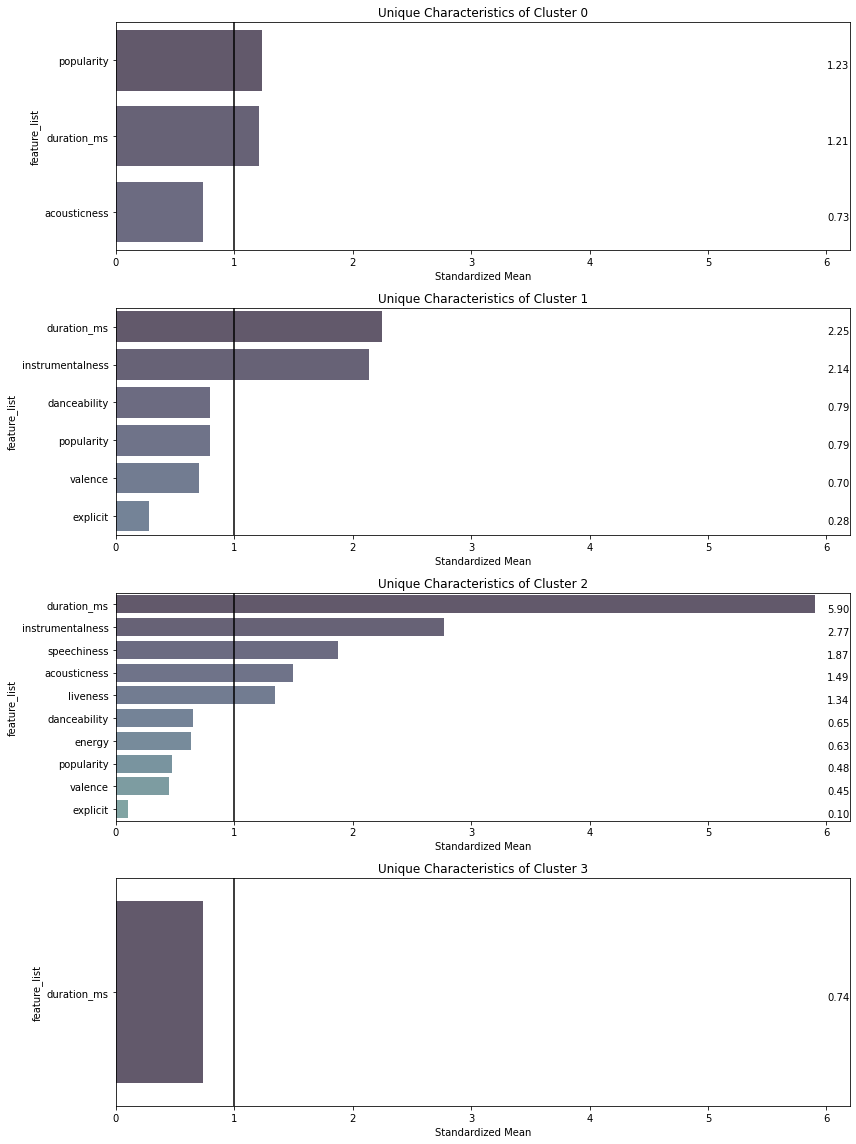

In [457]:
plot_features_all_cluster(df=df_n, label_col='cluster', n_clusters=4, sensitivity=0.2)

# Predictions

In [89]:
#import dataset
df = pd.read_csv('data.csv')
df.head()

acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428     1   
1    8    0.0763   -28.454     1   
2    5    0.1190   -19.924     0   
3    1    0.1110   -14.734     0   
4   11    0.0980   -16.829     1   

                                            name  popularity release_date  \
0                    Singende Bataillone 1. Teil           0         1928   
1       Fantasiestücke, Op. 111: Più tosto lento           0         1928   
2                 Chapter 1.18 - Zamek kaniowski           0         1928   
3  Bebamos Juntos - Instrumental (Remasterizado)           0   1928-09-25   
4    Polonaise-Fantaisie in A-Flat Major, Op. 61           1         1928   

   speechiness    tempo  valence  year  
0       0.0506  118.469   0.7790  1928  
1       0.0462   83.972   0.0767  1928  
2       0.9290  107.177   0.8800  1928  
3       0.0926  108.003   0.7200  1928  
4       0.0424   62.149   0.0693  1928

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [91]:
#drop useless dummy columns
df = df.drop(['id', 'artists', 'release_date', 'name'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   danceability      169909 non-null  float64
 2   duration_ms       169909 non-null  int64  
 3   energy            169909 non-null  float64
 4   explicit          169909 non-null  int64  
 5   instrumentalness  169909 non-null  float64
 6   key               169909 non-null  int64  
 7   liveness          169909 non-null  float64
 8   loudness          169909 non-null  float64
 9   mode              169909 non-null  int64  
 10  popularity        169909 non-null  int64  
 11  speechiness       169909 non-null  float64
 12  tempo             169909 non-null  float64
 13  valence           169909 non-null  float64
 14  year              169909 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 19.4 MB


In [92]:
#drop data before 1980(include 1980)
df = df[df['year'] > 1980]
df.head()

acousticness  danceability  duration_ms  energy  explicit  \
4154      0.688000         0.675       179560   0.368         0   
4155      0.311000         0.728       190653   0.820         0   
4156      0.305000         0.333       145933   0.712         0   
4157      0.000108         0.345       193106   0.944         0   
4158      0.066000         0.901       255600   0.550         0   

      instrumentalness  key  liveness  loudness  mode  popularity  \
4154          0.000000    2    0.0612   -11.337     1          28   
4155          0.000506    7    0.2620    -7.588     1          33   
4156          0.950000    2    0.3590   -15.726     1          30   
4157          0.614000    2    0.7050    -7.320     1          30   
4158          0.001130    1    0.0396   -15.008     0          38   

      speechiness    tempo  valence  year  
4154       0.0287  105.677   0.4720  1981  
4155       0.0485  122.228   0.7810  1981  
4156       0.1030  112.776   0.0279  1981  
4157       0.0677   97.945   0.4960  1981  
4158       0.0339  124.479   0.9830  1981

In [93]:
#change duration_ms into duration_s
df['duration_s'] = df['duration_ms'] / 1000.0
df.drop(labels = ['duration_ms'], axis = 'columns', inplace = True)
df.head()

acousticness  danceability  energy  explicit  instrumentalness  key  \
4154      0.688000         0.675   0.368         0          0.000000    2   
4155      0.311000         0.728   0.820         0          0.000506    7   
4156      0.305000         0.333   0.712         0          0.950000    2   
4157      0.000108         0.345   0.944         0          0.614000    2   
4158      0.066000         0.901   0.550         0          0.001130    1   

      liveness  loudness  mode  popularity  speechiness    tempo  valence  \
4154    0.0612   -11.337     1          28       0.0287  105.677   0.4720   
4155    0.2620    -7.588     1          33       0.0485  122.228   0.7810   
4156    0.3590   -15.726     1          30       0.1030  112.776   0.0279   
4157    0.7050    -7.320     1          30       0.0677   97.945   0.4960   
4158    0.0396   -15.008     0          38       0.0339  124.479   0.9830   

      year  duration_s  
4154  1981     179.560  
4155  1981     190.653  
4156  1981     145.933  
4157  1981     193.106  
4158  1981     255.600

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79656 entries, 4154 to 169908
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      79656 non-null  float64
 1   danceability      79656 non-null  float64
 2   energy            79656 non-null  float64
 3   explicit          79656 non-null  int64  
 4   instrumentalness  79656 non-null  float64
 5   key               79656 non-null  int64  
 6   liveness          79656 non-null  float64
 7   loudness          79656 non-null  float64
 8   mode              79656 non-null  int64  
 9   popularity        79656 non-null  int64  
 10  speechiness       79656 non-null  float64
 11  tempo             79656 non-null  float64
 12  valence           79656 non-null  float64
 13  year              79656 non-null  int64  
 14  duration_s        79656 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 9.7 MB


In [95]:
#subset the dataset baseed on year
df_81_90 = df[(df['year'] >= 1981) & (df['year'] <= 1990)]
df_91_00 = df[(df['year'] >= 1991) & (df['year'] <= 2000)]
df_01_10 = df[(df['year'] >= 2001) & (df['year'] <= 2010)]
df_11_20 = df[(df['year'] >= 2011) & (df['year'] <= 2020)]

In [96]:
df_81_90.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 4154 to 166908
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      20000 non-null  float64
 1   danceability      20000 non-null  float64
 2   energy            20000 non-null  float64
 3   explicit          20000 non-null  int64  
 4   instrumentalness  20000 non-null  float64
 5   key               20000 non-null  int64  
 6   liveness          20000 non-null  float64
 7   loudness          20000 non-null  float64
 8   mode              20000 non-null  int64  
 9   popularity        20000 non-null  int64  
 10  speechiness       20000 non-null  float64
 11  tempo             20000 non-null  float64
 12  valence           20000 non-null  float64
 13  year              20000 non-null  int64  
 14  duration_s        20000 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 2.4 MB


In [97]:
df_91_00.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 5154 to 167908
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      20000 non-null  float64
 1   danceability      20000 non-null  float64
 2   energy            20000 non-null  float64
 3   explicit          20000 non-null  int64  
 4   instrumentalness  20000 non-null  float64
 5   key               20000 non-null  int64  
 6   liveness          20000 non-null  float64
 7   loudness          20000 non-null  float64
 8   mode              20000 non-null  int64  
 9   popularity        20000 non-null  int64  
 10  speechiness       20000 non-null  float64
 11  tempo             20000 non-null  float64
 12  valence           20000 non-null  float64
 13  year              20000 non-null  int64  
 14  duration_s        20000 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 2.4 MB


In [98]:
df_01_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 6154 to 168908
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      20000 non-null  float64
 1   danceability      20000 non-null  float64
 2   energy            20000 non-null  float64
 3   explicit          20000 non-null  int64  
 4   instrumentalness  20000 non-null  float64
 5   key               20000 non-null  int64  
 6   liveness          20000 non-null  float64
 7   loudness          20000 non-null  float64
 8   mode              20000 non-null  int64  
 9   popularity        20000 non-null  int64  
 10  speechiness       20000 non-null  float64
 11  tempo             20000 non-null  float64
 12  valence           20000 non-null  float64
 13  year              20000 non-null  int64  
 14  duration_s        20000 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 2.4 MB


In [99]:
df_11_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19656 entries, 7154 to 169908
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      19656 non-null  float64
 1   danceability      19656 non-null  float64
 2   energy            19656 non-null  float64
 3   explicit          19656 non-null  int64  
 4   instrumentalness  19656 non-null  float64
 5   key               19656 non-null  int64  
 6   liveness          19656 non-null  float64
 7   loudness          19656 non-null  float64
 8   mode              19656 non-null  int64  
 9   popularity        19656 non-null  int64  
 10  speechiness       19656 non-null  float64
 11  tempo             19656 non-null  float64
 12  valence           19656 non-null  float64
 13  year              19656 non-null  int64  
 14  duration_s        19656 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 2.4 MB


In [100]:
df1 = df_81_90
df2 = df_91_00
df3 = df_01_10
df4 = df_11_20

In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 4154 to 166908
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      20000 non-null  float64
 1   danceability      20000 non-null  float64
 2   energy            20000 non-null  float64
 3   explicit          20000 non-null  int64  
 4   instrumentalness  20000 non-null  float64
 5   key               20000 non-null  int64  
 6   liveness          20000 non-null  float64
 7   loudness          20000 non-null  float64
 8   mode              20000 non-null  int64  
 9   popularity        20000 non-null  int64  
 10  speechiness       20000 non-null  float64
 11  tempo             20000 non-null  float64
 12  valence           20000 non-null  float64
 13  year              20000 non-null  int64  
 14  duration_s        20000 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 2.4 MB


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79656 entries, 4154 to 169908
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      79656 non-null  float64
 1   danceability      79656 non-null  float64
 2   energy            79656 non-null  float64
 3   explicit          79656 non-null  int64  
 4   instrumentalness  79656 non-null  float64
 5   key               79656 non-null  int64  
 6   liveness          79656 non-null  float64
 7   loudness          79656 non-null  float64
 8   mode              79656 non-null  int64  
 9   popularity        79656 non-null  int64  
 10  speechiness       79656 non-null  float64
 11  tempo             79656 non-null  float64
 12  valence           79656 non-null  float64
 13  year              79656 non-null  int64  
 14  duration_s        79656 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 9.7 MB


# Model Building (Regression tree)

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import sklearn.model_selection as cv

In [104]:
#81-90
x1=df1.drop(columns=['popularity'])
y1= df1['popularity']
train_x, test_x, train_y, test_y = cv.train_test_split(x1,y1,train_size=0.8,
                                                    test_size=0.2,random_state = 42)

In [105]:
rf = RandomForestRegressor(max_depth = 2, random_state=0)

In [106]:
# Fit 'rf' to the training set
rf.fit(train_x, train_y)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(test_x)
y_pred_train=rf.predict(train_x)
# Evaluate the test set RMSE
mse_test = MSE(test_y, y_pred)
mse_train = MSE(train_y, y_pred_train)
# Print the test set RMSE
print('Test set MSE of rf: {:.2f}'.format(mse_test))
print('Train set MSE of rf: {:.2f}'.format(mse_train))

Test set MSE of rf: 107.75
Train set MSE of rf: 107.85


In [107]:
rf.score(test_x,test_y )

0.03163670339516367

# If I drop some Cols of df1

In [108]:
df11 = df1.drop(columns=['acousticness', 'key'])

In [109]:
#81-90
x11=df11.drop(columns=['popularity'])
y11= df11['popularity']
train_x, test_x, train_y, test_y = cv.train_test_split(x11,y11,train_size=0.8,
                                                    test_size=0.2,random_state = 42)

In [110]:
# Fit 'rf' to the training set
rf.fit(train_x, train_y)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(test_x)
y_pred_train=rf.predict(train_x)
# Evaluate the test set RMSE
mse_test = MSE(test_y, y_pred)
mse_train = MSE(train_y, y_pred_train)
# Print the test set RMSE
print('Test set MSE of rf: {:.2f}'.format(mse_test))
print('Train set MSE of rf: {:.2f}'.format(mse_train))

Test set MSE of rf: 107.75
Train set MSE of rf: 107.85


In [111]:
rf.score(test_x,test_y )

0.03163670339516367

In [112]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 5154 to 167908
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      20000 non-null  float64
 1   danceability      20000 non-null  float64
 2   energy            20000 non-null  float64
 3   explicit          20000 non-null  int64  
 4   instrumentalness  20000 non-null  float64
 5   key               20000 non-null  int64  
 6   liveness          20000 non-null  float64
 7   loudness          20000 non-null  float64
 8   mode              20000 non-null  int64  
 9   popularity        20000 non-null  int64  
 10  speechiness       20000 non-null  float64
 11  tempo             20000 non-null  float64
 12  valence           20000 non-null  float64
 13  year              20000 non-null  int64  
 14  duration_s        20000 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 2.4 MB


In [113]:
#91-00
x=df2.drop(columns=['popularity'])
y= df2['popularity']
train_x2, test_x2, train_y2, test_y2 = cv.train_test_split(x,y,train_size=0.8,
                                                    test_size=0.2,random_state = 42)

In [114]:
# Fit 'rf' to the training set
rf.fit(train_x2, train_y2)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(test_x2)
# Evaluate the test set RMSE
mse_test = MSE(test_y2, y_pred)
# Print the test set RMSE
print('Test set MSE of rf: {:.2f}'.format(mse_test))

Test set MSE of rf: 84.24


In [115]:
rf.score(test_x2,test_y2 )

0.039002122762830216

In [116]:
#01-10
x=df3.drop(columns=['popularity'])
y= df3['popularity']
train_x3, test_x3, train_y3, test_y3 = cv.train_test_split(x,y,train_size=0.8,
                                                    test_size=0.2,random_state = 42)

In [117]:
# Fit 'rf' to the training set
rf.fit(train_x3, train_y3)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(test_x3)
# Evaluate the test set RMSE
mse_test = MSE(test_y3, y_pred)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(mse_test))

Test set RMSE of rf: 64.29


In [118]:
rf.score(test_x3,test_y3 )

0.0330542776280951

In [119]:
#11-20
x=df4.drop(columns=['popularity'])
y= df4['popularity']
train_x4, test_x4, train_y4, test_y4 = cv.train_test_split(x,y,train_size=0.8,
                                                    test_size=0.2,random_state = 42)

In [120]:
# Fit 'rf' to the training set
rf.fit(train_x4, train_y4)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(test_x4)
y_pred_train=rf.predict(train_x4)
# Evaluate the test set RMSE
mse_test = MSE(test_y4, y_pred)
mse_train = MSE(train_y4, y_pred_train)
# Print the test set RMSE
print('Test set MSE of rf: {:.2f}'.format(mse_test))
print('Train set MSE of rf: {:.2f}'.format(mse_train))

Test set MSE of rf: 93.38
Train set MSE of rf: 82.85


In [121]:
rf.score(test_x4,test_y4 )

0.21040140698756538

In [122]:
## Total
x_total=df.drop(columns=['popularity'])
y_total= df['popularity']
train_x5, test_x5, train_y5, test_y5 = cv.train_test_split(x,y,train_size=0.8,
                                                    test_size=0.2,random_state = 42)

In [123]:
# Fit 'rf' to the training set
rf.fit(train_x5, train_y5)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(test_x5)
y_pred_train=rf.predict(train_x5)
# Evaluate the test set RMSE
mse_test = MSE(test_y5, y_pred)
mse_train = MSE(train_y5, y_pred_train)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(mse_test))
print('Train set RMSE of rf: {:.2f}'.format(mse_train))

Test set RMSE of rf: 93.38
Train set RMSE of rf: 82.85


In [124]:
format(mse_test)

'93.38072678817552'

In [125]:
rf.score(test_x5,test_y5 )

0.21040140698756538

# Linear Regression

In [126]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 4154 to 166908
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      20000 non-null  float64
 1   danceability      20000 non-null  float64
 2   energy            20000 non-null  float64
 3   explicit          20000 non-null  int64  
 4   instrumentalness  20000 non-null  float64
 5   key               20000 non-null  int64  
 6   liveness          20000 non-null  float64
 7   loudness          20000 non-null  float64
 8   mode              20000 non-null  int64  
 9   popularity        20000 non-null  int64  
 10  speechiness       20000 non-null  float64
 11  tempo             20000 non-null  float64
 12  valence           20000 non-null  float64
 13  year              20000 non-null  int64  
 14  duration_s        20000 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 2.4 MB


In [127]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 5154 to 167908
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      20000 non-null  float64
 1   danceability      20000 non-null  float64
 2   energy            20000 non-null  float64
 3   explicit          20000 non-null  int64  
 4   instrumentalness  20000 non-null  float64
 5   key               20000 non-null  int64  
 6   liveness          20000 non-null  float64
 7   loudness          20000 non-null  float64
 8   mode              20000 non-null  int64  
 9   popularity        20000 non-null  int64  
 10  speechiness       20000 non-null  float64
 11  tempo             20000 non-null  float64
 12  valence           20000 non-null  float64
 13  year              20000 non-null  int64  
 14  duration_s        20000 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 2.4 MB


In [128]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 6154 to 168908
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      20000 non-null  float64
 1   danceability      20000 non-null  float64
 2   energy            20000 non-null  float64
 3   explicit          20000 non-null  int64  
 4   instrumentalness  20000 non-null  float64
 5   key               20000 non-null  int64  
 6   liveness          20000 non-null  float64
 7   loudness          20000 non-null  float64
 8   mode              20000 non-null  int64  
 9   popularity        20000 non-null  int64  
 10  speechiness       20000 non-null  float64
 11  tempo             20000 non-null  float64
 12  valence           20000 non-null  float64
 13  year              20000 non-null  int64  
 14  duration_s        20000 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 2.4 MB


In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
x=df.drop(columns=['popularity'])
y= df['popularity']
train_x, test_x, train_y, test_y = cv.train_test_split(x,y,train_size=0.5,
                                                    test_size=0.5,random_state = 42)

In [131]:
Lr_model = LinearRegression()
Lr_model.fit(train_x, train_y)
pricted_y = Lr_model.predict(test_x)

In [132]:
mse_test = MSE(test_y, pricted_y)
print('mse_test : ',round(mse_test, 2))

mse_test :  88.48


In [133]:
Lr_model.score(train_x, train_y)

0.46293215243395036

If I frop cols in df

In [134]:
x=df11.drop(columns=['popularity'])
y= df11['popularity']
train_x, test_x, train_y, test_y = cv.train_test_split(x,y,train_size=0.5,
                                                    test_size=0.5,random_state = 42)

In [135]:
Lr_model = LinearRegression()
Lr_model.fit(train_x, train_y)
pricted_y = Lr_model.predict(test_x)

In [136]:
mse_test = MSE(test_y, pricted_y)
print('mse_test : ',round(mse_test, 2))

mse_test :  108.06


In [137]:
Lr_model.score(train_x, train_y)

0.051820094087554947

# OLS

In [138]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [143]:
x1=df1.drop(columns=['popularity'])
y1= df1['popularity']
model = sm.OLS(y1, x1).fit()
summary1 = model.summary()
print(summary1)

                                 OLS Regression Results                                
Dep. Variable:             popularity   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                          1.850e+04
Date:                Sun, 01 May 2022   Prob (F-statistic):                        0.00
Time:                        19:48:26   Log-Likelihood:                         -75227.
No. Observations:               20000   AIC:                                  1.505e+05
Df Residuals:                   19986   BIC:                                  1.506e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [83]:
x2=df2.drop(columns=['popularity'])
y2= df2['popularity']
model = sm.OLS(y2, x2).fit()
summary2 = model.summary()
print(summary2)

                                 OLS Regression Results                                
Dep. Variable:             popularity   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          3.282e+04
Date:                Thu, 28 Apr 2022   Prob (F-statistic):                        0.00
Time:                        16:30:30   Log-Likelihood:                         -72852.
No. Observations:               20000   AIC:                                  1.457e+05
Df Residuals:                   19986   BIC:                                  1.458e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [84]:
x3=df3.drop(columns=['popularity'])
y3= df3['popularity']
model = sm.OLS(y3, x3).fit()
summary3 = model.summary()
print(summary3)

                                 OLS Regression Results                                
Dep. Variable:             popularity   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                          5.467e+04
Date:                Thu, 28 Apr 2022   Prob (F-statistic):                        0.00
Time:                        16:30:30   Log-Likelihood:                         -70193.
No. Observations:               20000   AIC:                                  1.404e+05
Df Residuals:                   19986   BIC:                                  1.405e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [85]:
x4=df4.drop(columns=['popularity'])
y4= df4['popularity']
model = sm.OLS(y4, x4).fit()
summary4 = model.summary()
print(summary4)

                                 OLS Regression Results                                
Dep. Variable:             popularity   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                          4.957e+04
Date:                Thu, 28 Apr 2022   Prob (F-statistic):                        0.00
Time:                        16:30:31   Log-Likelihood:                         -73539.
No. Observations:               19656   AIC:                                  1.471e+05
Df Residuals:                   19642   BIC:                                  1.472e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [ ]:
x=df.drop(columns=['popularity'])
y= df['popularity']
model = sm.OLS(y, x).fit()
summary = model.summary()
print(summary)

### Sentiment Analysis ###

In [529]:
#import the packages
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vidis\AppData\Roaming\nltk_data...


###Data prepration

In [531]:
import pandas as pd
!pip install plotly
#read the csv file
df = pd.read_csv('data.csv')
df.head()

#We only want data after 1980 because no one really listen to the songs before this time
df = df.loc[(df.year > 1980)]

df.head(10)

acousticness                              artists  danceability  \
4154      0.688000                  ['David Allan Coe']         0.675   
4155      0.311000                      ['Stan Rogers']         0.728   
4156      0.305000                       ['Black Flag']         0.333   
4157      0.000108                      ['Def Leppard']         0.345   
4158      0.066000                  ['Kool & The Gang']         0.901   
4159      0.010600                            ['Crass']         0.620   
4160      0.837000                          ['Leo Dan']         0.488   
4161      0.204000  ['Tom Petty and the Heartbreakers']         0.640   
4162      0.008160                     ['Billy Squier']         0.336   
4163      0.789000                    ['Black Sabbath']         0.149   

      duration_ms  energy  explicit                      id  instrumentalness  \
4154       179560   0.368         0  79K36XF7WlgTvP3JbW17UE          0.000000   
4155       190653   0.820         0  1RqsqWiZNe4yIWkC5Cjvq6          0.000506   
4156       145933   0.712         0  35BOEtOvV1qwzjblSKcPJ1          0.950000   
4157       193106   0.944         0  4uS6cFeJsUGWMRJCC8j5oZ          0.614000   
4158       255600   0.550         0  2E5I3d41LCqAJPWmSzrVXv          0.001130   
4159       237640   0.996         0  6m5LdqzYJPL8gNwwerAXjB          0.000000   
4160       189547   0.267         0  7t7jQXStfDGkZBxbKMXwV9          0.034200   
4161       202867   0.777         0  1ruNQCGE5wAh4ouGcLjEcI          0.000000   
4162       176987   0.884         0  2HzDmnAxKk767YueykEGbr          0.000203   
4163       171947   0.344         0  2lwdQsBtFYBNnXhRNTB90D          0.967000   

      key  liveness  loudness  mode                               name  \
4154    2    0.0612   -11.337     1                  Tennessee Whiskey   
4155    7    0.2620    -7.588     1                         Canol Road   
4156    2    0.3590   -15.726     1                            No More   
4157    2    0.7050    -7.320     1                           No No No   
4158    1    0.0396   -15.008     0                         Be My Lady   
4159    2    0.0583    -8.284     1                     Systemic Death   
4160    1    0.1190   -16.019     0               Tengo Todo por Hacer   
4161    5    0.0654    -7.057     1                     Letting You Go   
4162    4    0.0825    -5.830     0  You Know What I Like - Remastered   
4163   10    0.1200   -19.607     0              E5150 - 2008 Remaster   

      popularity release_date  speechiness    tempo  valence  year  
4154          28   1981-08-01       0.0287  105.677   0.4720  1981  
4155          33         1981       0.0485  122.228   0.7810  1981  
4156          30         1981       0.1030  112.776   0.0279  1981  
4157          30   1981-07-11       0.0677   97.945   0.4960  1981  
4158          38         1981       0.0339  124.479   0.9830  1981  
4159          31   1981-01-01       0.1160  111.956   0.1850  1981  
4160          39         1981       0.0451   90.701   0.2400  1981  
4161          27   1981-05-05       0.0338  106.623   0.6790  1981  
4162          29         1981       0.1290  136.685   0.6350  1981  
4163          27   1981-11-04       0.0584   77.471   0.0922  1981

In [532]:

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Plot a graph to see the overall Popularity among the songs
fig = px.histogram(df, x="popularity")
fig.update_traces(marker_color="pink",marker_line_color='rgb(111,222,333)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Popularity')
fig.show()

###Data Cleansing

In [533]:

df["row_id"] = df.index + 1
###drop the data in name colunm that contains "$"
df.drop(index=df[df['name'].str.contains("\\$")].index, inplace=True)
df

df.head(10)

acousticness                              artists  danceability  \
4154      0.688000                  ['David Allan Coe']         0.675   
4155      0.311000                      ['Stan Rogers']         0.728   
4156      0.305000                       ['Black Flag']         0.333   
4157      0.000108                      ['Def Leppard']         0.345   
4158      0.066000                  ['Kool & The Gang']         0.901   
4159      0.010600                            ['Crass']         0.620   
4160      0.837000                          ['Leo Dan']         0.488   
4161      0.204000  ['Tom Petty and the Heartbreakers']         0.640   
4162      0.008160                     ['Billy Squier']         0.336   
4163      0.789000                    ['Black Sabbath']         0.149   

      duration_ms  energy  explicit                      id  instrumentalness  \
4154       179560   0.368         0  79K36XF7WlgTvP3JbW17UE          0.000000   
4155       190653   0.820         0  1RqsqWiZNe4yIWkC5Cjvq6          0.000506   
4156       145933   0.712         0  35BOEtOvV1qwzjblSKcPJ1          0.950000   
4157       193106   0.944         0  4uS6cFeJsUGWMRJCC8j5oZ          0.614000   
4158       255600   0.550         0  2E5I3d41LCqAJPWmSzrVXv          0.001130   
4159       237640   0.996         0  6m5LdqzYJPL8gNwwerAXjB          0.000000   
4160       189547   0.267         0  7t7jQXStfDGkZBxbKMXwV9          0.034200   
4161       202867   0.777         0  1ruNQCGE5wAh4ouGcLjEcI          0.000000   
4162       176987   0.884         0  2HzDmnAxKk767YueykEGbr          0.000203   
4163       171947   0.344         0  2lwdQsBtFYBNnXhRNTB90D          0.967000   

      key  liveness  loudness  mode                               name  \
4154    2    0.0612   -11.337     1                  Tennessee Whiskey   
4155    7    0.2620    -7.588     1                         Canol Road   
4156    2    0.3590   -15.726     1                            No More   
4157    2    0.7050    -7.320     1                           No No No   
4158    1    0.0396   -15.008     0                         Be My Lady   
4159    2    0.0583    -8.284     1                     Systemic Death   
4160    1    0.1190   -16.019     0               Tengo Todo por Hacer   
4161    5    0.0654    -7.057     1                     Letting You Go   
4162    4    0.0825    -5.830     0  You Know What I Like - Remastered   
4163   10    0.1200   -19.607     0              E5150 - 2008 Remaster   

      popularity release_date  speechiness    tempo  valence  year  row_id  
4154          28   1981-08-01       0.0287  105.677   0.4720  1981    4155  
4155          33         1981       0.0485  122.228   0.7810  1981    4156  
4156          30         1981       0.1030  112.776   0.0279  1981    4157  
4157          30   1981-07-11       0.0677   97.945   0.4960  1981    4158  
4158          38         1981       0.0339  124.479   0.9830  1981    4159  
4159          31   1981-01-01       0.1160  111.956   0.1850  1981    4160  
4160          39         1981       0.0451   90.701   0.2400  1981    4161  
4161          27   1981-05-05       0.0338  106.623   0.6790  1981    4162  
4162          29         1981       0.1290  136.685   0.6350  1981    4163  
4163          27   1981-11-04       0.0584   77.471   0.0922  1981    4164

In [534]:
#Make a new dataframe that only shows row id and name of the song
df_subset = df[['row_id', 'name']].copy()
#Delete the spceical characters in the name of songs
df_subset['name'] = df_subset['name'].str.replace("[^a-zA-Z#]", " ")
df_subset['name'] = df_subset['name'].replace(r'\s+', ' ', regex=True)
#lowercase the names
df_subset['name'] = df_subset['name'].str.casefold()
df_subset.head(10)

row_id                             name
4154    4155                tennessee whiskey
4155    4156                       canol road
4156    4157                          no more
4157    4158                         no no no
4158    4159                       be my lady
4159    4160                   systemic death
4160    4161             tengo todo por hacer
4161    4162                   letting you go
4162    4163  you know what i like remastered
4163    4164                       e remaster

In [535]:
#Create a new dataframe showing the sentiment score
df1=pd.DataFrame()
df1['row_id']=['9999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

###Run the model

In [536]:
#Run the sentiment score model
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['row_id']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=t_df.append(df1)

t_df_cleaned = t_df[t_df.row_id != '9999999']

t_df_cleaned = t_df_cleaned.drop_duplicates()

t_df_cleaned = t_df[t_df.sentiment_type == 'compound']

print(t_df_cleaned.head(10))

   row_id sentiment_type  sentiment_score
0    4155       compound           0.0000
0    4156       compound           0.0000
0    4157       compound          -0.2960
0    4158       compound          -0.6808
0    4159       compound           0.0000
0    4160       compound          -0.5994
0    4161       compound           0.0000
0    4162       compound           0.0000
0    4163       compound           0.3612
0    4164       compound           0.0000


In [537]:
#merge the sentiment score with the original dataset
df_output = pd.merge(df, t_df_cleaned, on='row_id', how='inner')
df_output.head(10)

acousticness                              artists  danceability  \
0      0.688000                  ['David Allan Coe']         0.675   
1      0.311000                      ['Stan Rogers']         0.728   
2      0.305000                       ['Black Flag']         0.333   
3      0.000108                      ['Def Leppard']         0.345   
4      0.066000                  ['Kool & The Gang']         0.901   
5      0.010600                            ['Crass']         0.620   
6      0.837000                          ['Leo Dan']         0.488   
7      0.204000  ['Tom Petty and the Heartbreakers']         0.640   
8      0.008160                     ['Billy Squier']         0.336   
9      0.789000                    ['Black Sabbath']         0.149   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       179560   0.368         0  79K36XF7WlgTvP3JbW17UE          0.000000   
1       190653   0.820         0  1RqsqWiZNe4yIWkC5Cjvq6          0.000506   
2       145933   0.712         0  35BOEtOvV1qwzjblSKcPJ1          0.950000   
3       193106   0.944         0  4uS6cFeJsUGWMRJCC8j5oZ          0.614000   
4       255600   0.550         0  2E5I3d41LCqAJPWmSzrVXv          0.001130   
5       237640   0.996         0  6m5LdqzYJPL8gNwwerAXjB          0.000000   
6       189547   0.267         0  7t7jQXStfDGkZBxbKMXwV9          0.034200   
7       202867   0.777         0  1ruNQCGE5wAh4ouGcLjEcI          0.000000   
8       176987   0.884         0  2HzDmnAxKk767YueykEGbr          0.000203   
9       171947   0.344         0  2lwdQsBtFYBNnXhRNTB90D          0.967000   

   key  liveness  ...                               name  popularity  \
0    2    0.0612  ...                  Tennessee Whiskey          28   
1    7    0.2620  ...                         Canol Road          33   
2    2    0.3590  ...                            No More          30   
3    2    0.7050  ...                           No No No          30   
4    1    0.0396  ...                         Be My Lady          38   
5    2    0.0583  ...                     Systemic Death          31   
6    1    0.1190  ...               Tengo Todo por Hacer          39   
7    5    0.0654  ...                     Letting You Go          27   
8    4    0.0825  ...  You Know What I Like - Remastered          29   
9   10    0.1200  ...              E5150 - 2008 Remaster          27   

  release_date  speechiness    tempo  valence  year  row_id  sentiment_type  \
0   1981-08-01       0.0287  105.677   0.4720  1981    4155        compound   
1         1981       0.0485  122.228   0.7810  1981    4156        compound   
2         1981       0.1030  112.776   0.0279  1981    4157        compound   
3   1981-07-11       0.0677   97.945   0.4960  1981    4158        compound   
4         1981       0.0339  124.479   0.9830  1981    4159        compound   
5   1981-01-01       0.1160  111.956   0.1850  1981    4160        compound   
6         1981       0.0451   90.701   0.2400  1981    4161        compound   
7   1981-05-05       0.0338  106.623   0.6790  1981    4162        compound   
8         1981       0.1290  136.685   0.6350  1981    4163        compound   
9   1981-11-04       0.0584   77.471   0.0922  1981    4164        compound   

   sentiment_score  
0           0.0000  
1           0.0000  
2          -0.2960  
3          -0.6808  
4           0.0000  
5          -0.5994  
6           0.0000  
7           0.0000  
8           0.3612  
9           0.0000  

[10 rows x 22 columns]

In [538]:
#show the overall info about the name's sentiment score
df_output[["sentiment_score"]].describe()

sentiment_score
count     79547.000000
mean          0.027004
std           0.259559
min          -0.964300
25%           0.000000
50%           0.000000
75%           0.000000
max           0.957100

<AxesSubplot:title={'center':'Sentiment Score'}, xlabel='Year', ylabel='Mean Sentiment Score'>

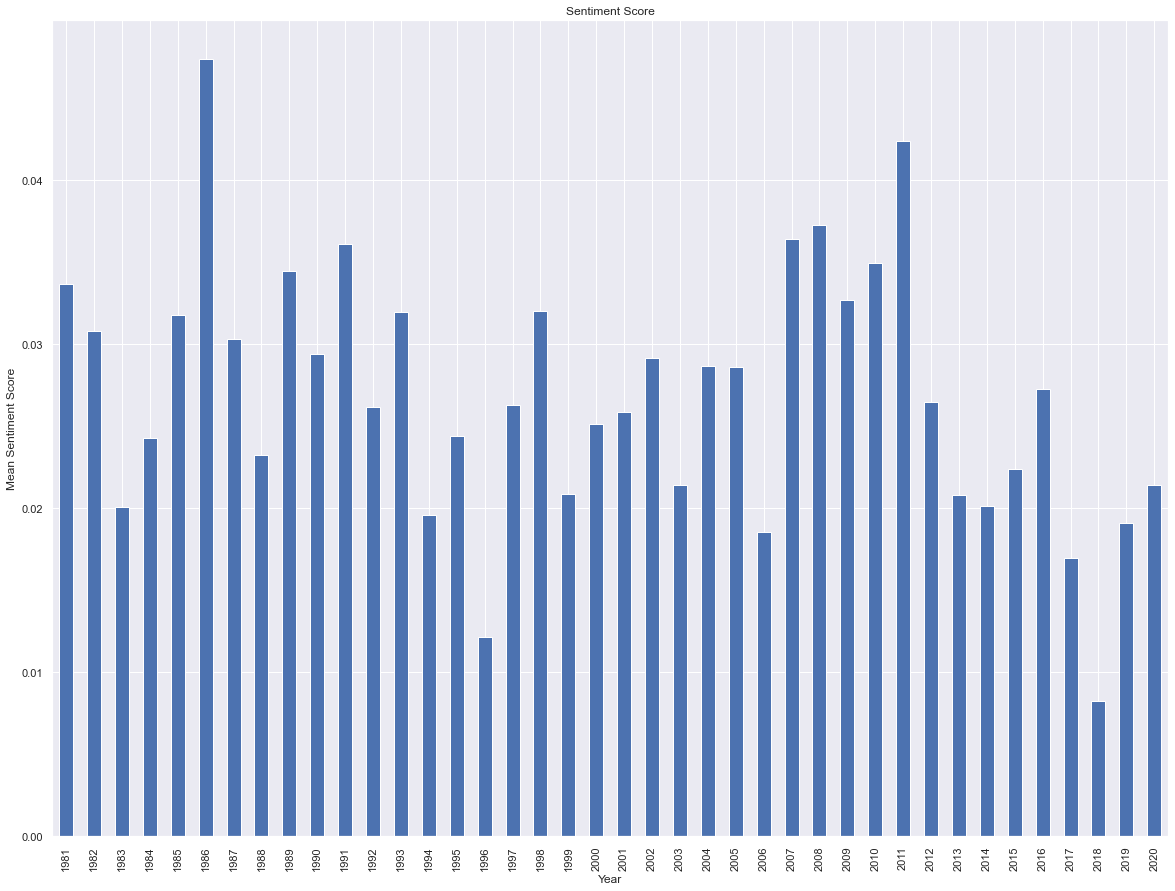

In [539]:
#Show the relation ship between popularity vs. mean Sentiment score
dfg = df_output.groupby(['year'])['sentiment_score'].mean()

dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Year', figsize=(20, 15))

In [540]:
#Show the name of songs that has the highest sentiment score and its popularity
pd.set_option('display.max_rows', None)
df_output[['name', 'sentiment_score','popularity']].sort_values(by='sentiment_score', ascending=False).head(6)

name  sentiment_score  \
39                    Love Me Tonight (Love, Love, Love)           0.9571   
65647  432Hz Miracle Tone: Raise Positive Vibrations ...           0.9413   
33243  My Love, Sweet Love - from Waiting to Exhale -...           0.9287   
15172                                     Love Love Love           0.9274   
11167                                     Love Love Love           0.9274   
27242  Let Me Love You (Until You Learn To Love Yours...           0.9274   

       popularity  
39             41  
65647          49  
33243          33  
15172          47  
11167          57  
27242          56

In [541]:
df_output[['name', 'sentiment_score','popularity']].sort_values(by='sentiment_score', ascending=True).head(6)

name  sentiment_score  \
36098  No Fear, No Hate, No Pain (No Broken Hearts) -...          -0.9643   
5407                                         Die Die Die          -0.9136   
22587                                        Die Die Die          -0.9136   
19691                             Gang Shit No Lame Shit          -0.9042   
1420                            Shit, Damn, Motherfucker          -0.8979   
23103                              Fuck The Po-Po - Live          -0.8934   

       popularity  
36098          29  
5407           37  
22587          42  
19691          59  
1420           42  
23103          45

<AxesSubplot:title={'center':'Sentiment Score'}, xlabel='Popularity', ylabel='Mean Sentiment Score'>

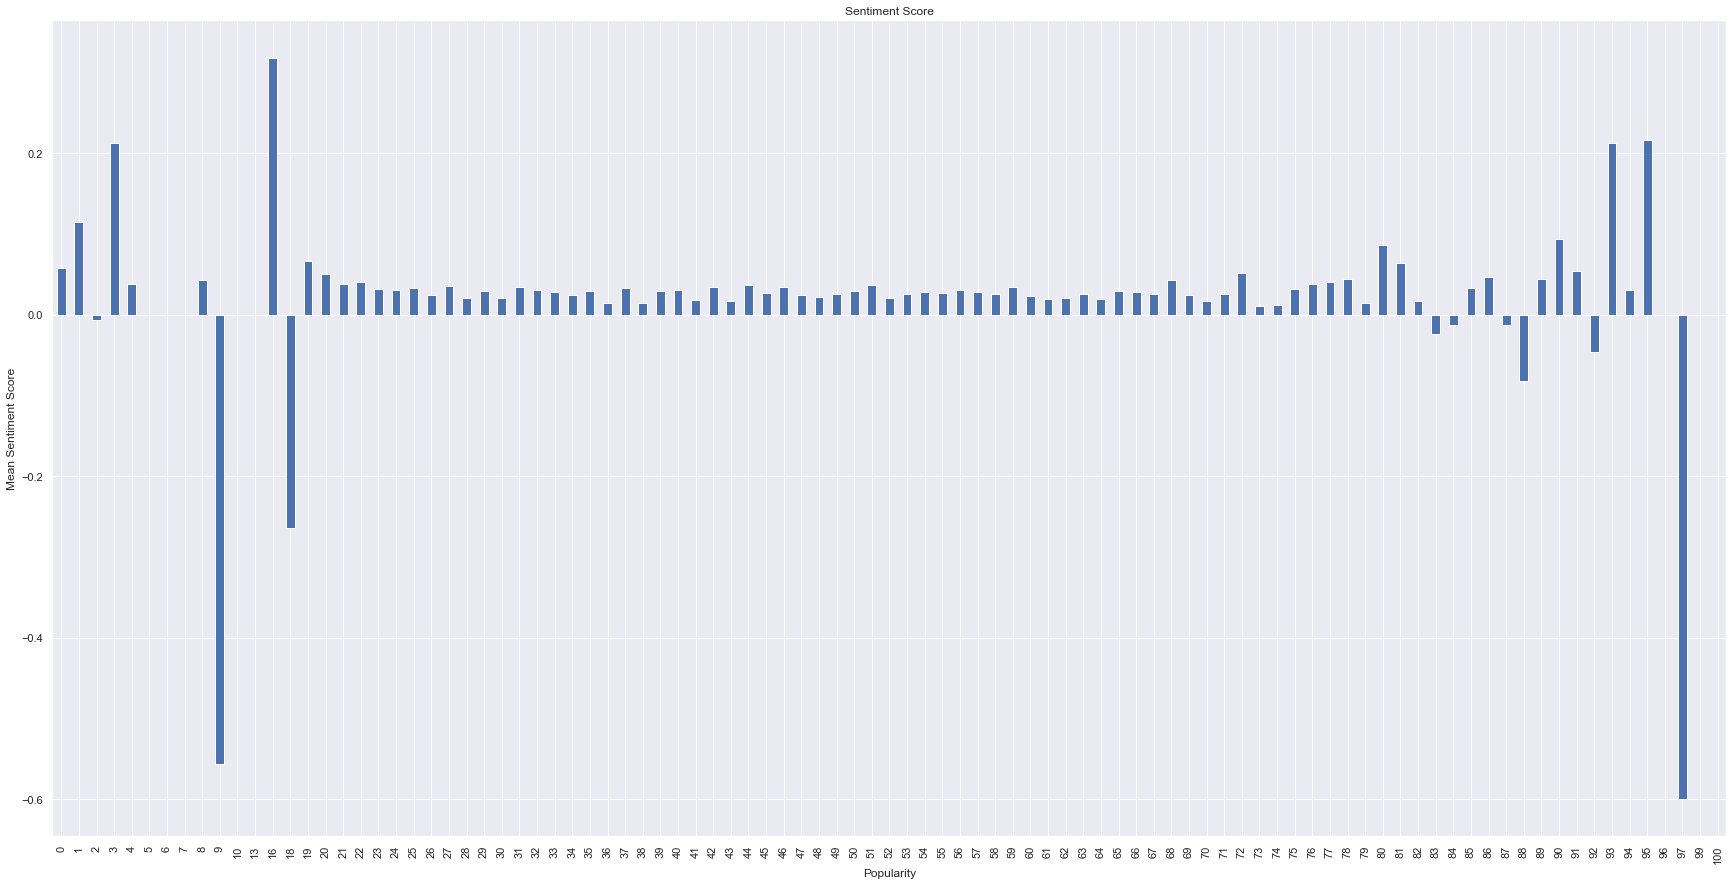

In [542]:
#Shows the relationship between Sentiment Score and Popularity
#df_output = df_output.loc[(df_output.popularity > 80)]
dfg = df_output.groupby(['popularity'])['sentiment_score'].mean()
#df = df.loc[(df.year > 1980)]
dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Popularity', figsize=(30, 15))

### Content based recommendations ###

In [544]:
df=pd.read_csv('Data.csv')
df.head()

acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428     1   
1    8    0.0763   -28.454     1   
2    5    0.1190   -19.924     0   
3    1    0.1110   -14.734     0   
4   11    0.0980   -16.829     1   

                                            name  popularity release_date  \
0                    Singende Bataillone 1. Teil           0         1928   
1       Fantasiestücke, Op. 111: Più tosto lento           0         1928   
2                 Chapter 1.18 - Zamek kaniowski           0         1928   
3  Bebamos Juntos - Instrumental (Remasterizado)           0   1928-09-25   
4    Polonaise-Fantaisie in A-Flat Major, Op. 61           1         1928   

   speechiness    tempo  valence  year  
0       0.0506  118.469   0.7790  1928  
1       0.0462   83.972   0.0767  1928  
2       0.9290  107.177   0.8800  1928  
3       0.0926  108.003   0.7200  1928  
4       0.0424   62.149   0.0693  1928

In [466]:
df.head()

acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428     1   
1    8    0.0763   -28.454     1   
2    5    0.1190   -19.924     0   
3    1    0.1110   -14.734     0   
4   11    0.0980   -16.829     1   

                                            name  popularity release_date  \
0                    Singende Bataillone 1. Teil           0         1928   
1       Fantasiestücke, Op. 111: Più tosto lento           0         1928   
2                 Chapter 1.18 - Zamek kaniowski           0         1928   
3  Bebamos Juntos - Instrumental (Remasterizado)           0   1928-09-25   
4    Polonaise-Fantaisie in A-Flat Major, Op. 61           1         1928   

   speechiness    tempo  valence  year  
0       0.0506  118.469   0.7790  1928  
1       0.0462   83.972   0.0767  1928  
2       0.9290  107.177   0.8800  1928  
3       0.0926  108.003   0.7200  1928  
4       0.0424   62.149   0.0693  1928

In [545]:
#Checking for any null values (% of missing values)
missing_values=df.isnull().sum().sort_values(ascending=False)*100/len(df)
missing_values = pd.DataFrame(missing_values,columns = ['Missing_Percent'])


In [468]:
missing_values.head(10)

Missing_Percent
acousticness              0.0
loudness                  0.0
valence                   0.0
tempo                     0.0
speechiness               0.0
release_date              0.0
popularity                0.0
name                      0.0
mode                      0.0
liveness                  0.0

In [546]:
df=df.drop(columns=['release_date','id'])

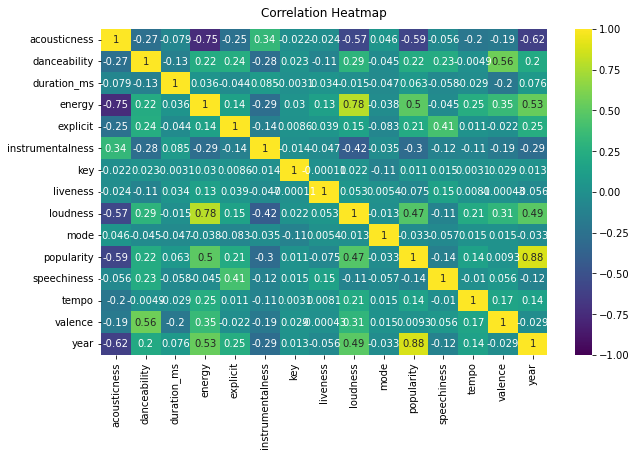

In [470]:
plt.figure(figsize=(10,6))

heatmap = sns.heatmap(df.corr(), vmin=-1,vmax=1, annot=True, cmap='viridis')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

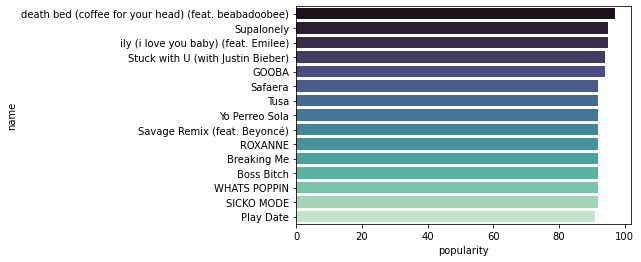

In [383]:
popular_names = df.groupby("name")['popularity'].mean().sort_values(ascending=False).head(15)
axis = sns.barplot(popular_names,popular_names.index,palette="mako")

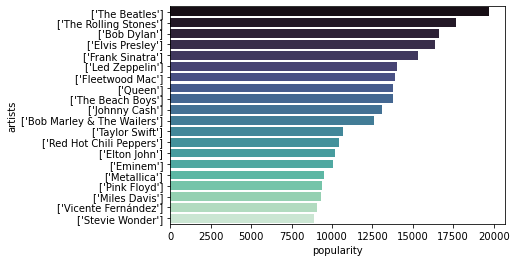

In [471]:
popular = df.groupby("artists")['popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(popular,popular.index,palette="mako")

Text(0.5, 1.05, 'Number of songs released Yearwise')

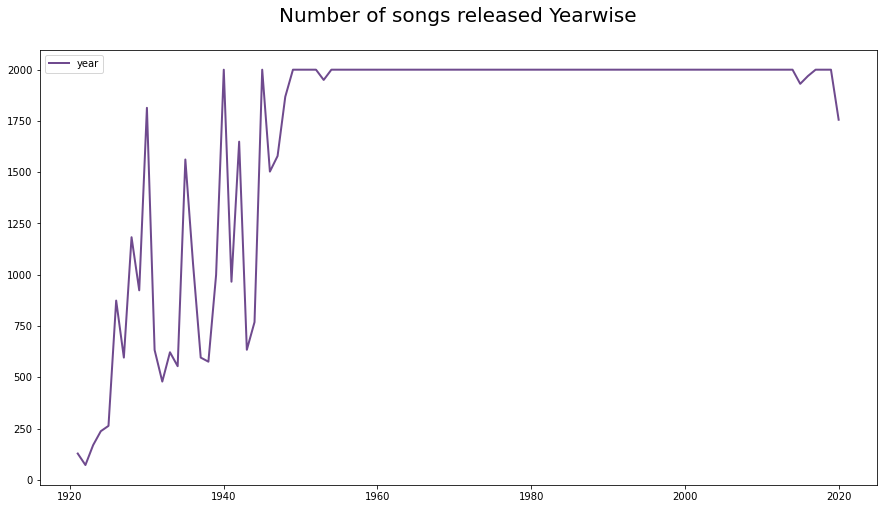

In [472]:
year = pd.DataFrame(df['year'].value_counts())
year = year.sort_index()
ax=year.plot(kind='line',figsize=(15,8) ,color='#6f4a8e', linewidth=2)
plt.title("Number of songs released Yearwise",y=1.05,fontsize=20)


In [478]:
#Transforming the popularity column
df.loc[df['popularity'] < 57, 'popularity'] = 0 
df.loc[df['popularity'] >= 57, 'popularity'] = 1
df.head()

df_copy.loc[df['popularity'] < 57, 'popularity'] = 0 
df_copy.loc[df['popularity'] >= 57, 'popularity'] = 1
df_copy.head()

acousticness  artists  danceability  duration_ms  energy  explicit  \
0         0.995     4880         0.708       158648  0.1950         0   
1         0.994    25163         0.379       282133  0.0135         0   
2         0.604    26351         0.749       104300  0.2200         0   
3         0.995     9738         0.781       180760  0.1300         0   
4         0.990    10245         0.210       687733  0.2040         0   

   instrumentalness  key  liveness  loudness  mode   name  popularity  \
0             0.563   10    0.1510   -12.428     1  96100           0   
1             0.901    8    0.0763   -28.454     1  34247           0   
2             0.000    5    0.1190   -19.924     0  18622           0   
3             0.887    1    0.1110   -14.734     0  11093           0   
4             0.908   11    0.0980   -16.829     1  84575           0   

   speechiness    tempo  valence  year  
0       0.0506  118.469   0.7790  1928  
1       0.0462   83.972   0.0767  1928  
2       0.9290  107.177   0.8800  1928  
3       0.0926  108.003   0.7200  1928  
4       0.0424   62.149   0.0693  1928

In [479]:
#Remove the Square Brackets from the artists
df["artists"]=df["artists"].str.replace("[", "")
df["artists"]=df["artists"].str.replace("]", "")
df["artists"]=df["artists"].str.replace("'", "")
df.head()

acousticness                             artists  danceability  \
0         0.995                     Carl Woitschach         0.708   
1         0.994  Robert Schumann, Vladimir Horowitz         0.379   
2         0.604                 Seweryn Goszczyński         0.749   
3         0.995                    Francisco Canaro         0.781   
4         0.990  Frédéric Chopin, Vladimir Horowitz         0.210   

   duration_ms  energy  explicit  instrumentalness  key  liveness  loudness  \
0       158648  0.1950         0             0.563   10    0.1510   -12.428   
1       282133  0.0135         0             0.901    8    0.0763   -28.454   
2       104300  0.2200         0             0.000    5    0.1190   -19.924   
3       180760  0.1300         0             0.887    1    0.1110   -14.734   
4       687733  0.2040         0             0.908   11    0.0980   -16.829   

   mode                                           name  popularity  \
0     1                    Singende Bataillone 1. Teil           0   
1     1       Fantasiestücke, Op. 111: Più tosto lento           0   
2     0                 Chapter 1.18 - Zamek kaniowski           0   
3     0  Bebamos Juntos - Instrumental (Remasterizado)           0   
4     1    Polonaise-Fantaisie in A-Flat Major, Op. 61           0   

   speechiness    tempo  valence  year  
0       0.0506  118.469   0.7790  1928  
1       0.0462   83.972   0.0767  1928  
2       0.9290  107.177   0.8800  1928  
3       0.0926  108.003   0.7200  1928  
4       0.0424   62.149   0.0693  1928

In [562]:
from numpy.linalg import norm
class Song_Recommender():
    """
    Neighbourhood Based Collborative Filterng REcoomendation System using similarity Metrics
    Manhattan Distance is calculated for all songs and Recommend Songs that are similar to it based on any given song
    """
    def __init__(self, data):
        self.data_ = data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, n_top):
        distances = []
        #choosing the given song_name and dropping it from the data
        song = self.data_[(self.data_.name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(rem_data.values):
            dist = 0
            for col in np.arange(len(rem_data.columns)):
                #indeces of non-numerical columns(artists,name)
                if not col in [1,11]:
                    #calculating the manhettan distances for each numerical feature
                    #dist = dist + norm(float(song[col]) - float(r_song[col]))
                    dist = dist + np.dot(float(song[col]) ,float(r_song[col]))/(norm(float(song[col]))*norm(float(r_song[col])))
            distances.append(dist)
        rem_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        rem_data = rem_data.sort_values('distance')
        columns = ['artists', 'name']
        return rem_data[columns][:n_top]

In [564]:
#Instantiate recommender class
recommender = Song_Recommender(df)
recommender.get_recommendations('high hopes', 5)

100%|████████████████████████████████████████████████████████████████████████| 169905/169905 [00:46<00:00, 3667.72it/s]


artists  \
0                       ['Carl Woitschach']   
1  ['Robert Schumann', 'Vladimir Horowitz']   
2                   ['Seweryn Goszczyński']   
3                      ['Francisco Canaro']   
4  ['Frédéric Chopin', 'Vladimir Horowitz']   

                                            name  
0                    Singende Bataillone 1. Teil  
1       Fantasiestücke, Op. 111: Più tosto lento  
2                 Chapter 1.18 - Zamek kaniowski  
3  Bebamos Juntos - Instrumental (Remasterizado)  
4    Polonaise-Fantaisie in A-Flat Major, Op. 61